In [1]:
import LoadAndPreprocessDataset

Loading  100  files (seconds): 0.8407127857208252
Size of X:	12800000 bytes
Shape of X:	 (100, 16000)
Transforming  100  elements (seconds): 0.3017594814300537
Size of trasformed: 	8064000 bytes
Shape of transformed:	 (100, 80, 126)
(100, 80, 126)


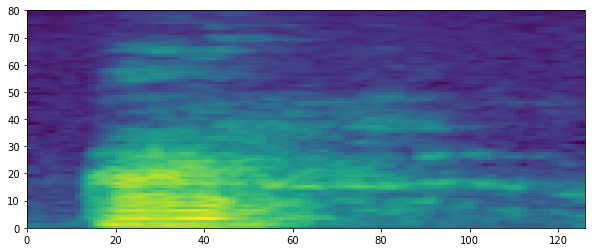

In [9]:
import time
import matplotlib.pyplot as plt

#Load filenames
train,val,test = LoadAndPreprocessDataset.loadDatasetFilenames()

#batch_size=len(test)
batch_size=100

start = time.time()
#Load Trainfiles
X,y=LoadAndPreprocessDataset.loadBatch(train,batch_size=batch_size)
end = time.time()
print("Loading ", batch_size, " files (seconds):", end - start)
print("Size of X:\t%d bytes" % (X.nbytes))
print("Shape of X:\t",X.shape)

start = time.time()
#Extract features
#features=LoadAndPreprocessDataset.MFCC_DELTA_12(X)
features=LoadAndPreprocessDataset.melspect(X)
end = time.time()
print("Transforming ", batch_size, " elements (seconds):", end - start)
print("Size of trasformed: \t%d bytes" % (features.nbytes))
print("Shape of transformed:\t",features.shape)

print(features.shape)
plt.figure(figsize=(10, 4))
plt.pcolormesh(features[0])
plt.show()

In [3]:
del(X)

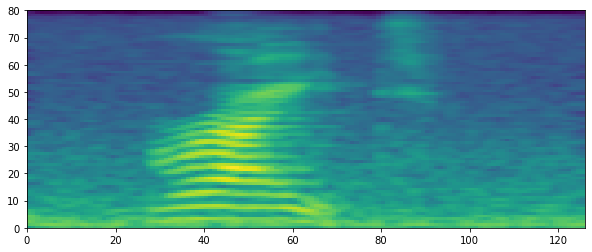

In [4]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(features[10])
plt.show()